In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("dataset.csv")

In [19]:
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


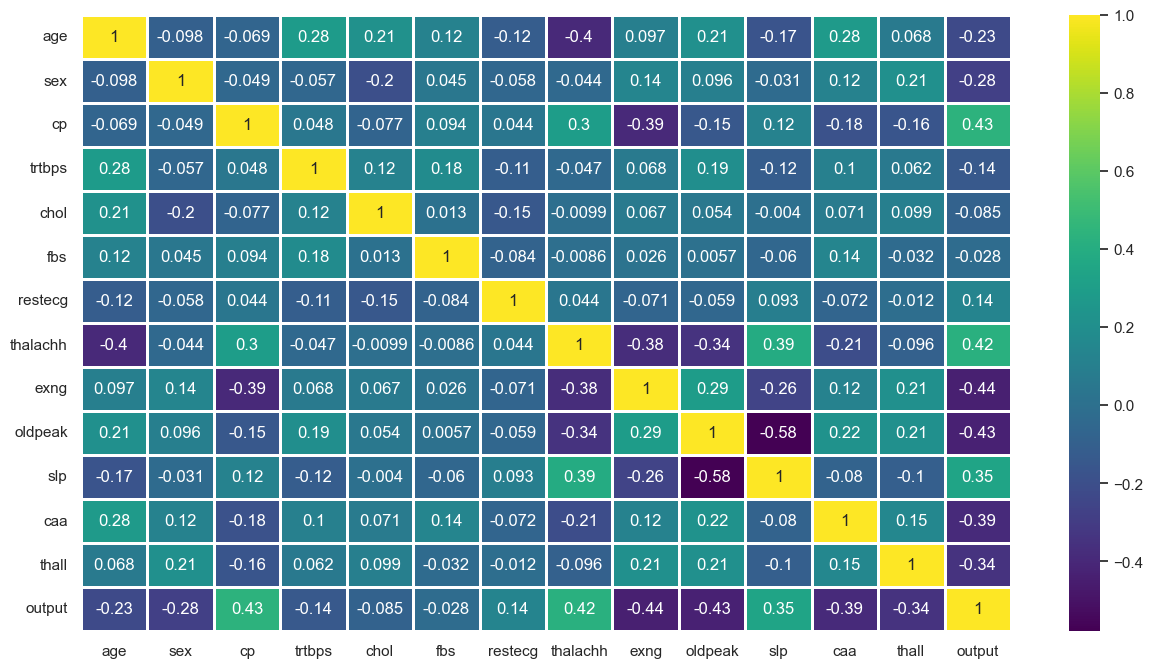

In [82]:
sns.set(rc = {"figure.figsize":(15,8)})
sns.heatmap(df.corr(),annot = True,linewidth = 1,cmap = "viridis")
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
x = df.drop("output",axis = 1)
y = df["output"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

## With RandomForestClassifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
model = RandomForestClassifier(n_estimators=50)

In [21]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [23]:
predicted = model.predict(x_test)

In [24]:
model.score(x_test,y_test)

0.8351648351648352

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
confusion_matrix(y_test,predicted)

array([[35,  9],
       [ 6, 41]], dtype=int64)

In [27]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        44
           1       0.82      0.87      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



# With KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Finding K_value

In [55]:
error_rate = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))

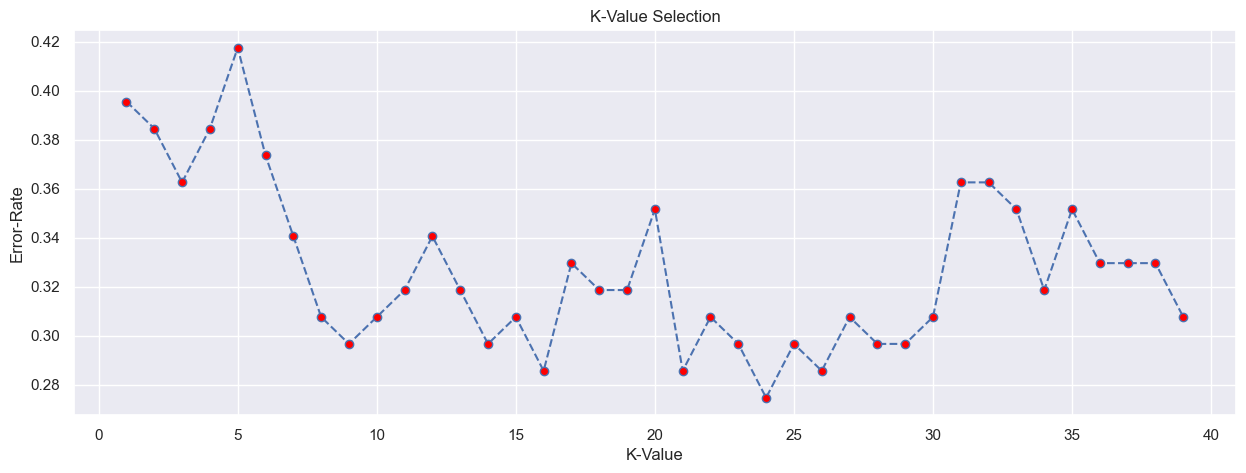

In [56]:
plt.figure(figsize = (15,5))
plt.plot(range(1,40),k_value,marker = "o",linestyle = "dashed",markerfacecolor = "red")
plt.title("K-Value Selection")
plt.xlabel("K-Value")
plt.ylabel("Error-Rate")
plt.show()

In [57]:
knn = KNeighborsClassifier(n_neighbors=24)

In [58]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [59]:
y_pred = knn.predict(x_test)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        44
           1       0.73      0.74      0.74        47

    accuracy                           0.73        91
   macro avg       0.73      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91



In [61]:
confusion_matrix(y_test,y_pred)

array([[31, 13],
       [12, 35]], dtype=int64)

# Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
tree = DecisionTreeClassifier()

In [64]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [65]:
tpred = tree.predict(x_test)

In [66]:
print(classification_report(y_test,tpred))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78        44
           1       0.76      0.94      0.84        47

    accuracy                           0.81        91
   macro avg       0.83      0.81      0.81        91
weighted avg       0.83      0.81      0.81        91



In [67]:
confusion_matrix(y_test,tpred)

array([[30, 14],
       [ 3, 44]], dtype=int64)

# With SVM

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [110]:
model = SVC()
param_grid = {"C":[0.0001,0.001,0.01,0.1,1,10,100,1000],"gamma":[1000,100,10,1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,verbose = 3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ..............C=0.0001, gamma=1000;, score=0.558 total time=   0.0s
[CV 2/5] END ..............C=0.0001, gamma=1000;, score=0.558 total time=   0.0s
[CV 3/5] END ..............C=0.0001, gamma=1000;, score=0.548 total time=   0.0s
[CV 4/5] END ..............C=0.0001, gamma=1000;, score=0.548 total time=   0.0s
[CV 5/5] END ..............C=0.0001, gamma=1000;, score=0.571 total time=   0.0s
[CV 1/5] END ...............C=0.0001, gamma=100;, score=0.558 total time=   0.0s
[CV 2/5] END ...............C=0.0001, gamma=100;, score=0.558 total time=   0.0s
[CV 3/5] END ...............C=0.0001, gamma=100;, score=0.548 total time=   0.0s
[CV 4/5] END ...............C=0.0001, gamma=100;, score=0.548 total time=   0.0s
[CV 5/5] END ...............C=0.0001, gamma=100;, score=0.571 total time=   0.0s
[CV 1/5] END ................C=0.0001, gamma=10;, score=0.558 total time=   0.0s
[CV 2/5] END ................C=0.0001, gamma=10

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [107]:
grid.best_params_

{'C': 100, 'gamma': 0.0001}

In [112]:
grid.best_estimator_

SVC(C=100, gamma=0.0001)

In [115]:
svc_model = SVC(C =100,gamma = 0.0001)

In [118]:
svc_model.fit(x_train,y_train)

SVC(C=100, gamma=0.0001)

In [119]:
svc_pred = svc_model.predict(x_test)

In [120]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        44
           1       0.78      0.91      0.84        47

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [121]:
confusion_matrix(y_test,svc_pred)

array([[32, 12],
       [ 4, 43]], dtype=int64)

# Conclusion about Prediction:-
# (1) RandomForestClassifier accuracy = 84 %
# (2) KNeighborsClassifier accuracy   = 73 %
# (3) DecisionTreeClassifier accuracy = 81 %
# (4) SupportVectorClassifier accuracy= 82 %